In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/nguyen-thi-hoai-linh/mkt/main/bank-additional-full.csv',delimiter=';')
import seaborn as sns


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.isnull().sum().sum()

0

In [5]:
df.shape

(41188, 21)

In [6]:
####remove duplicated rows or columns
df = df.drop_duplicates(keep='first')
df = df.loc[:,~df.columns.duplicated()]
df.shape

(41176, 21)

In [7]:
cat_feats = [col for col in df.columns\
             if df[col].dtypes=='object']
num_feats = [col for col in df.columns\
            if df[col].dtypes!='object']
print('number of categorical features:',len(cat_feats))
print('number of numeric features:',len(num_feats))

number of categorical features: 11
number of numeric features: 10


In [8]:
Cat_List = {}
for cat in cat_feats:
    Cat_List[cat] = df[cat].nunique()

In [9]:
Cat_List

{'contact': 2,
 'day_of_week': 5,
 'default': 3,
 'education': 8,
 'housing': 3,
 'job': 12,
 'loan': 3,
 'marital': 4,
 'month': 10,
 'poutcome': 3,
 'y': 2}

In [10]:
df['education'].value_counts()/df.shape[0]

university.degree      0.295415
high.school            0.231008
basic.9y               0.146809
professional.course    0.127259
basic.4y               0.101418
basic.6y               0.055639
unknown                0.042015
illiterate             0.000437
Name: education, dtype: float64

In [11]:
df = df.replace(to_replace ="unknown",value = np.nan)

In [12]:
null_df = df.isnull().sum().reset_index()
null_df.columns = ['Features','Nbr_Null']
null_df['Pct_Null'] = round(100*null_df['Nbr_Null']/df.shape[0],2)

In [13]:
null_df

,Features,Nbr_Null,Pct_Null
0,age,0,0.00
1,job,330,0.80
2,marital,80,0.19
3,education,1730,4.20
4,default,8596,20.88
5,housing,990,2.40
6,loan,990,2.40
7,contact,0,0.00
8,month,0,0.00
9,day_of_week,0,0.00


In [14]:
#số người tham gia chiến dịch
df.shape

(41176, 21)

In [15]:
#số lượng khách đồng ý mở tài khoản
df['y'].apply(lambda x: 1 if x=='yes' else 0).sum()


4639

In [16]:
# Số lượng khách hàng đồng ý trên ngày
df[df['y']=='yes']['day_of_week'].value_counts()

thu    1044
tue     953
wed     949
mon     847
fri     846
Name: day_of_week, dtype: int64

# Calculate Conversion Rate

In [17]:
###encoder output variable
df['conversion'] = df['y']\
.apply(lambda x: 1 if x=='yes' else 0)
print('total conversions: {0} out of {1}'.format(df.conversion.sum(),df.shape[0]))
print('conversion rate: {:.2%}'.format((df.conversion.sum() / df.shape[0])))

total conversions: 4639 out of 41176
conversion rate: 11.27%


nhìn chung tỷ lệ những người đồng ý mở tài khoản rất ít

# **Insight**

# Conversion rates by age

In [18]:
conversions_by_age = df.groupby('age')['conversion'].sum()
nbr_customers_by_age = df.groupby('age')['conversion'].count()
conversion_rate_by_age = conversions_by_age/nbr_customers_by_age*100

In [19]:
conversion_rate_by_age

age
17     40.000000
18     42.857143
19     47.619048
20     35.384615
21     28.431373
         ...    
91      0.000000
92     75.000000
94      0.000000
95      0.000000
98    100.000000
Name: conversion, Length: 78, dtype: float64

In [20]:
df['age_range'] = df['age'].apply(lambda x: '[18-]' if x<18 else\
                                 '[18,24]' if (x<=24) else\
                                 '[25,40]' if (x<=40) else\
                                 '[41,60]' if (x<=60) else '60+'
                                 )

In [21]:
df['age_range'].value_counts()

[25,40]    22694
[41,60]    16506
[18,24]     1062
60+          909
[18-]          5
Name: age_range, dtype: int64

In [22]:
conversions_by_age = df.groupby('age_range')['conversion'].sum()
nbr_customers_by_age = df.groupby('age_range')['conversion'].count()
conversion_rate_by_age = conversions_by_age/nbr_customers_by_age*100

In [23]:
conversion_rate_by_age

age_range
60+        45.544554
[18,24]    23.917137
[18-]      40.000000
[25,40]    10.861902
[41,60]     9.111838
Name: conversion, dtype: float64

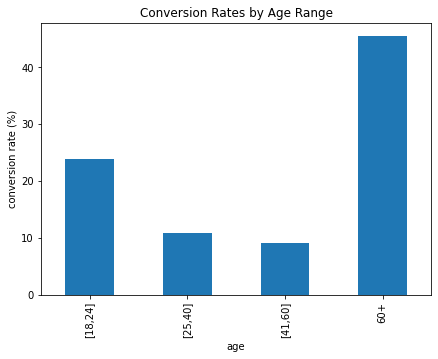

In [24]:
fig, ax = plt.subplots(figsize=(10,4))
conversion_rate_by_age.loc[['[18,24]','[25,40]','[41,60]','60+']].\
plot(kind='bar',figsize=[7,5])
ax.set_title('Conversion Rates by Age Range')
ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')
plt.show()

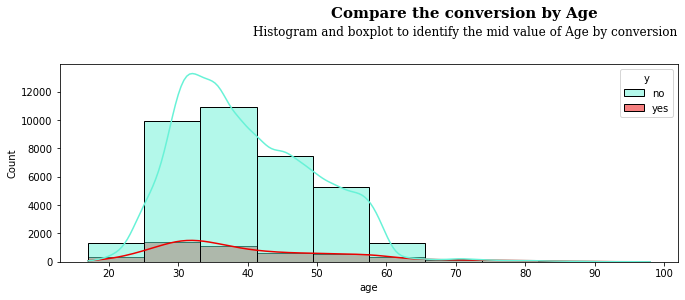

In [25]:
from matplotlib.gridspec import GridSpec

fig=plt.figure(figsize=(15,8), facecolor=(0.2,0.0,0.0,0.0), edgecolor='black')
plt.suptitle("Compare the conversion by Age", family='Serif', size=15,weight='bold')

plt.figtext(0.5,0.93,"Histogram and boxplot to identify the mid value of Age by conversion", family='Serif', size=12, ha='center')
gs = GridSpec(nrows=2, ncols=4, figure=fig)
ax1=plt.subplot(gs[0,:3])


sns.histplot(data=df, x='age', bins=10, ax=ax1, kde=True, hue='y', multiple='layer', element='bars', palette=['#68f2d7','#ed0000']);


có thể thấy tỷ lệ chuyển đổi của nhóm người từ 18-24 tuổi và trên 60 tuổi khá cao. Tuy nhiên số lượng khách hàng thuộc 2 nhóm trên không nhiều so với nhóm tuổi từ 18-24 và trên 60
=> cần xây dựng chiến dịch quảng cáo phù hợp để thu hút khách hàng trong 2 nhóm tuổi này 



# Conversion versus non-conversions

In [26]:
conversion_by_maritalstatus = pd.pivot_table(df,values='y',index='marital'\
               ,columns='conversion',aggfunc=len)

In [27]:
conversion_by_maritalstatus

conversion,0,1
marital,,
divorced,4135,476
married,22390,2531
single,9944,1620


In [28]:
conversion_by_maritalstatus['Total'] = conversion_by_maritalstatus.sum(axis=1)

In [29]:
conversion_by_maritalstatus

conversion,0,1,Total
marital,,,
divorced,4135,476,4611
married,22390,2531,24921
single,9944,1620,11564


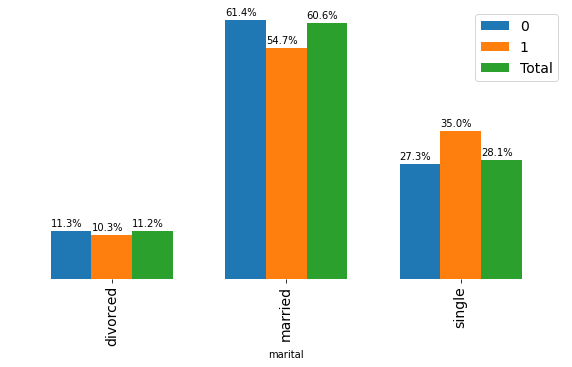

In [30]:
# colors_list = ['grey','#d9534f']
ax = (conversion_by_maritalstatus.div(conversion_by_maritalstatus.sum(0), axis=1)).plot(kind='bar',figsize=(10,5),\
                                                                                        width = 0.7,\
                                                                                        edgecolor=None)
plt.legend(labels=conversion_by_maritalstatus.columns,fontsize= 14)
plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    plt.yticks([])
#     plt.hlines(0.1126,-0.5,len(list(rotation_province.keys())))
    # Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.1%}'.format(height), (x, y + height + 0.01))

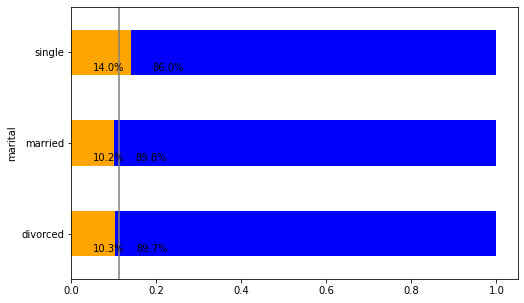

In [31]:
conversion_by_maritalstatus = conversion_by_maritalstatus[[1,0]]
ax = conversion_by_maritalstatus.div(conversion_by_maritalstatus\
                                .sum(axis=1),axis=0).plot(kind='barh',stacked=True,figsize=[8,5],color=['orange','blue'])
ax.get_legend().remove()####remove the legend. We can you also ax.get_legend().set_visible(False)
plt.vlines(0.1127,-0.7,len(conversion_by_maritalstatus),color='grey')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.1%}'.format(width),(x+0.05,y+0.05))

Dù tình trạng hôn nhân là độc thân, kết hôn hay li dị thì tỷ lệ khách hàng đăng kí mở tài khoản tiết kiệm đều tương đối thấp, tuy nhiên những người độc thân có xu hướng đồng ý mở tài khoản cao hơn so với 2 nhóm còn lại do sống 1 mình thường tiềm ẩn nhiều rủi ro hơn việc gửi tiền tiết kiệm sẽ an toàn hơn so với việc đầu tư tài chính phức tạp có độ rủi ro cao


> => cần tập trung vào nhóm người độc thân để tăng số lượng khách mở tài khoản




# Conversions by age and marital status 

In [32]:
#df['age_group'] = pd.cut(df['age'],bins=4,precision=0)


In [33]:
age_marital_df = df.groupby(['age_range','marital'])['conversion'].sum().unstack()

In [34]:
age_marital_df

marital,divorced,married,single
age_range,,,
60+,85.0,318.0,10.0
"[18,24]",0.0,12.0,242.0
[18-],NaN,NaN,2.0
"[25,40]",153.0,1097.0,1208.0
"[41,60]",238.0,1104.0,158.0


In [35]:
count_age_marital_df = age_marital_df.copy()

In [36]:
age_marital_df = age_marital_df.div(df.groupby(['age_range','marital'])['conversion'].count().unstack(),axis=0)

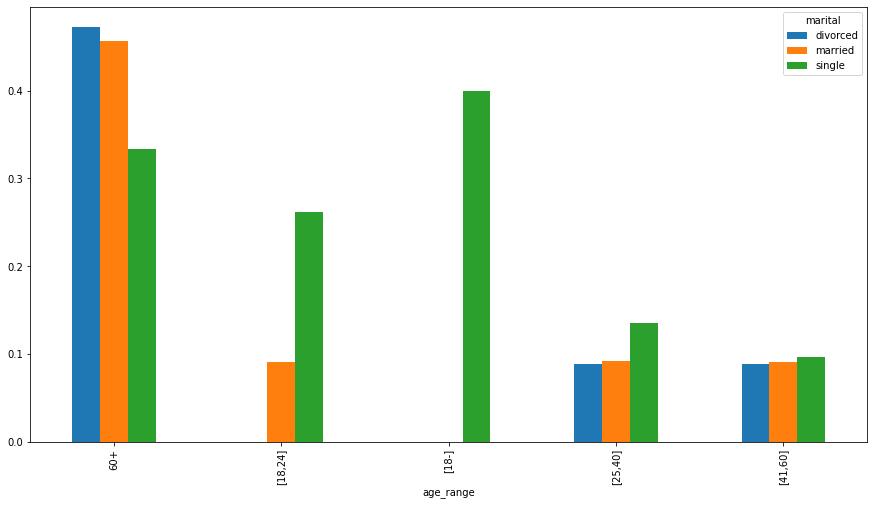

In [37]:

age_marital_df.plot(kind='bar',figsize=(15,8))

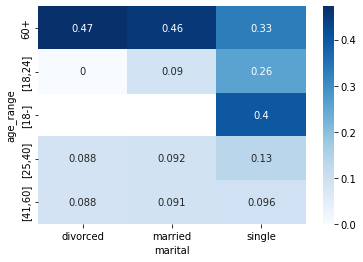

In [38]:
import seaborn as sns
hc = ['#e5e5ff', '#acacdf', '#7272bf', '#39399f', '#000080']
ax = sns.heatmap(age_marital_df,cmap='Blues',annot=True)

In [39]:
df_stacked = age_marital_df.unstack()
df_stacked = df_stacked.reset_index()
df_stacked = df_stacked.rename(columns = {0:'conversion_rate'})

In [40]:
df_stacked2 = count_age_marital_df.unstack()
df_stacked2 = df_stacked2.reset_index()

In [41]:
df_stacked2 = df_stacked2.rename(columns={0:'Totals'})

In [42]:
df_stacked2.columns

Index(['marital', 'age_range', 'Totals'], dtype='object')

In [43]:
df_stack = pd.merge(df_stacked, df_stacked2,on=['marital','age_range'],how='left')

In [44]:
df_stack

,marital,age_range,conversion_rate,Totals
0,divorced,60+,0.472222,85.0
1,divorced,"[18,24]",0.000000,0.0
2,divorced,[18-],NaN,NaN
3,divorced,"[25,40]",0.088439,153.0
4,divorced,"[41,60]",0.088246,238.0
5,married,60+,0.456241,318.0
6,married,"[18,24]",0.090226,12.0
7,married,[18-],NaN,NaN
8,married,"[25,40]",0.091738,1097.0
9,married,"[41,60]",0.090992,1104.0


In [45]:
import plotly.express as px
df_stack = df_stack[df_stack['Totals']!=0]
fig = px.treemap(df_stack, path=['marital', 'age_range'], values='Totals',\
                 color = 'conversion_rate',color_continuous_scale='RdBu')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=30, l=15, r=15, b=15))
fig.show()


Tỷ lệ chuyển đổi ở cả 3 tình trạng hôn nhân là độc thân, đã kết hôn hay li dị đều cao từ độ tuổi từ 66 tuổi trở lên. Tuy nhiên nhóm khách hàng trong độ tuổi này tương đối ít. Do đó cần tập trung mở rộng số lượng khách hàng trong độ tuổi này

In [46]:
df_0=df.copy()

In [47]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             40846 non-null  object 
 2   marital         41096 non-null  object 
 3   education       39446 non-null  object 
 4   default         32580 non-null  object 
 5   housing         40186 non-null  object 
 6   loan            40186 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [48]:
df_0=df_0.dropna(subset=['education',"job","loan"])


In [49]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38300 entries, 0 to 41187
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38300 non-null  int64  
 1   job             38300 non-null  object 
 2   marital         38234 non-null  object 
 3   education       38300 non-null  object 
 4   default         30537 non-null  object 
 5   housing         38300 non-null  object 
 6   loan            38300 non-null  object 
 7   contact         38300 non-null  object 
 8   month           38300 non-null  object 
 9   day_of_week     38300 non-null  object 
 10  duration        38300 non-null  int64  
 11  campaign        38300 non-null  int64  
 12  pdays           38300 non-null  int64  
 13  previous        38300 non-null  int64  
 14  poutcome        38300 non-null  object 
 15  emp.var.rate    38300 non-null  float64
 16  cons.price.idx  38300 non-null  float64
 17  cons.conf.idx   38300 non-null 

# **Does job titles affect conversion rate?**

In [50]:
df_0["job"].isnull().sum()

0

In [51]:
conversion_by_job = pd.pivot_table(df_0,values='y',index='job',columns='conversion',aggfunc=len)

In [52]:
conversion_by_job['Total'] = conversion_by_job.sum(axis=1)

In [53]:
conversion_by_job

conversion,0,1,Total
job,,,
admin.,8664,1284,9948
blue-collar,7972,598,8570
entrepreneur,1246,117,1363
housemaid,892,98,990
management,2427,304,2731
retired,1190,391,1581
self-employed,1208,146,1354
services,3422,297,3719
student,481,208,689


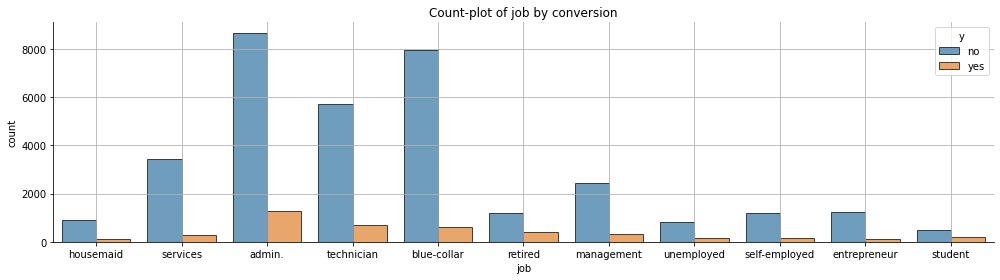

In [54]:
plt.figure(figsize=[14,4])
sns.countplot(x='job', hue='y',edgecolor="black", alpha=0.7, data=df_0)
sns.despine()
plt.title("Count-plot of job by conversion")
plt.grid()   # grid: hệ thống đường kẻ
plt.tight_layout()
plt.show()

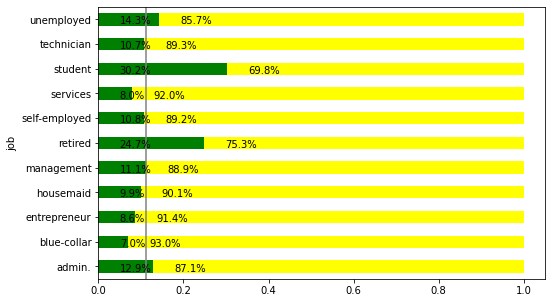

In [55]:
conversion_by_job = conversion_by_job[[1,0]]
ax = conversion_by_job.div(conversion_by_job\
                                .sum(axis=1),axis=0).plot(kind='barh',stacked=True,figsize=[8,5],color=['green','yellow'])
ax.get_legend().remove()####remove the legend. We can you also ax.get_legend().set_visible(False)
plt.vlines(0.1127,-0.7,len(conversion_by_job),color='grey')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.1%}'.format(width),(x+0.05,y+0.05))

 tỷ lệ đồng ý đăng kí gửi tiền tiết kiệm ở tất cả các nghề đều thấp hơn so với lượng người từ chối không đăng kí. Tuy nhiên đối với những người là Học sinh-sinh viên và nghỉ hưu có khả năng đồng ý đăng kí khá cao. Nguyên nhân là do đối với người già thì mục tiêu chính của họ là gửi tiết kiệm để an hưởng tuổi già và gửi tiền không kì hạn tuy lãi thấp nhưng lại là khoản đầu tư an toàn nhất. Đối với những người trẻ là học sinh sinh viên thì thường không có đủ tiền hoặc kiến thức chuyên môn để đầu tư vào những khoản đầu tư phức tạp, do vậy gửi tiền không kì hạn là cách đầu tư an toàn cho những đối tượng này. Do đó ngân hàng nên tập trung vào những khách hàng trẻ tuổi là học sinh sinh viên và người già


#**Does education titles affect conversion rate?** 

In [56]:
conversion_by_edu= pd.pivot_table(df_0,values='y',index='education',columns='conversion',aggfunc=len)
conversion_by_edu

conversion,0,1
education,,
basic.4y,3594,413
basic.6y,2029,180
basic.9y,5405,459
high.school,8247,1008
illiterate,14,4
professional.course,4525,578
university.degree,10220,1624


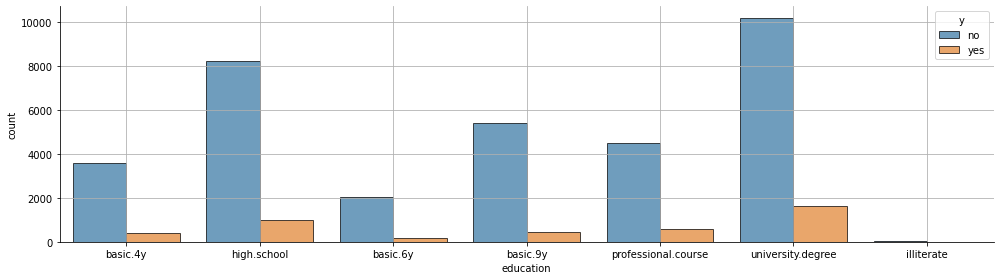

In [57]:
plt.figure(figsize=[14,4])
sns.countplot(x='education', hue='y',edgecolor="black", alpha=0.7, data=df_0)
sns.despine()
#plt.title("Count-plot of job by conversion")
plt.grid()   # grid: hệ thống đường kẻ
plt.tight_layout()
plt.show()

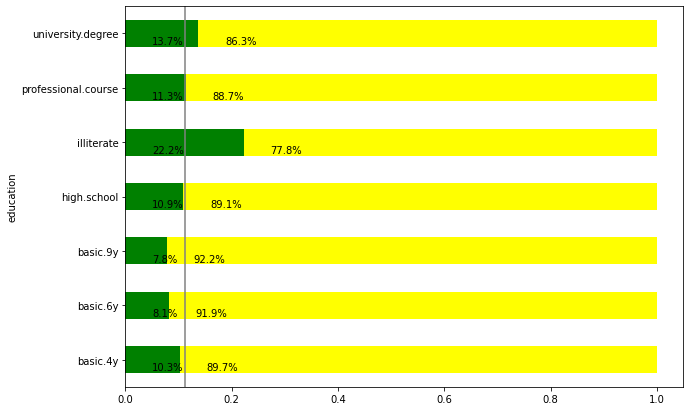

In [58]:
conversion_by_edu = conversion_by_edu[[1,0]]
ax = conversion_by_edu.div(conversion_by_edu\
                                .sum(axis=1),axis=0).plot(kind='barh',stacked=True,figsize=[10,7],color=['green','yellow'])
ax.get_legend().remove()####remove the legend. We can you also ax.get_legend().set_visible(False)
plt.vlines(0.1127,-0.7,len(conversion_by_edu),color='grey')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.1%}'.format(width),(x+0.05,y+0.05))

Biểu đồ cho thấy dù ở bất cứ trình độ giáo dục nào thì lượng khách hàng đồng ý mở tài khoản đều rất thấp. Tỉ lệ đồng ý đăng kí của nhóm illiterate cao hơn so với những nhóm khác tuy nhiên số lượng khách hàng ở nhóm này quá ít (18 khách hàng). Có thể thấy phần lớn trình độ giáo dục không ảnh hưởng nhiều đến việc đăng kí của khách hàng

# **Is conversion rate higher in the group having loan**

In [59]:
conversion_by_loan= pd.pivot_table(df_0,values='y',index='loan',columns='conversion',aggfunc=len)
conversion_by_loan['Total'] = conversion_by_loan.sum(axis=1)
conversion_by_loan

conversion,0,1,Total
loan,,,
no,28706,3627,32333
yes,5328,639,5967


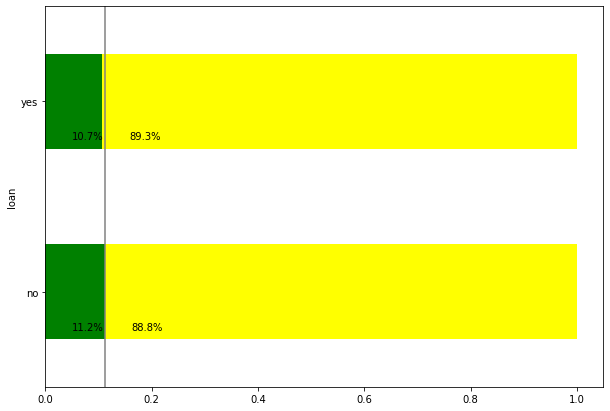

In [60]:
conversion_by_loan = conversion_by_loan[[1,0]]
ax = conversion_by_loan.div(conversion_by_loan\
                                .sum(axis=1),axis=0).plot(kind='barh',stacked=True,figsize=[10,7],color=['green','yellow'])
ax.get_legend().remove()####remove the legend. We can you also ax.get_legend().set_visible(False)
plt.vlines(0.1127,-0.7,len(conversion_by_loan),color='grey')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.1%}'.format(width),(x+0.05,y+0.05))

Is conversion rate higher in the group having loan?

We can see that the conversion on 'yes' in the group having loan is approximately similar to the opposite. So the answer is: No, the conversion rate is not higher in the group having loan.

In [61]:
loan_housing = df_0.groupby(['loan','housing'])['conversion'].count().unstack()

In [62]:
loan_housing

housing,no,yes
loan,,
no,15257,17076
yes,2443,3524


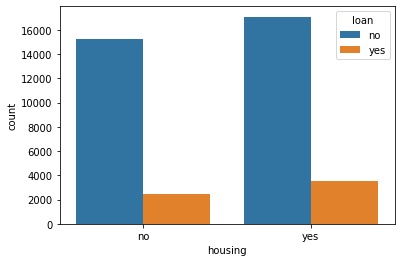

In [63]:
sns.countplot(x="housing", hue="loan", data=df_0);

plt.show()

# **Which day we should contact our customer**

In [64]:
df["day_of_week"]=df["day_of_week"].replace(["mon","tue","wed","thu","fri"],['2','3','4','5','6'])

In [65]:
days= pd.pivot_table(df_0,values='y',index='day_of_week',columns='conversion',aggfunc=len)
days

conversion,0,1
day_of_week,,
fri,6462,772
mon,7152,789
thu,7062,964
tue,6621,864
wed,6737,877


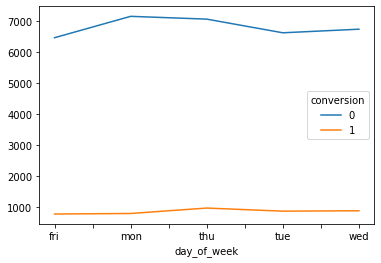

In [66]:
days.plot(kind='line')

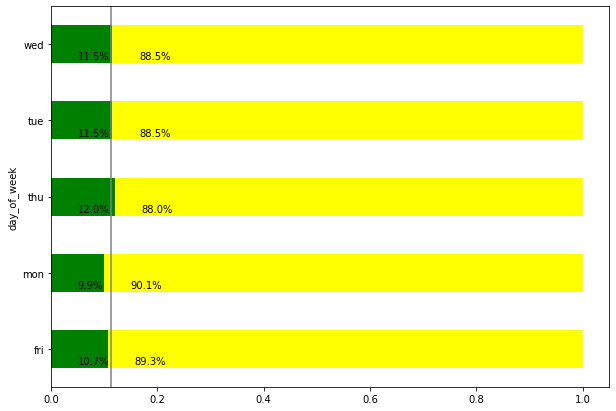

In [67]:
days= days[[1,0]]
ax = days.div(days.sum(axis=1),axis=0).plot(kind='barh',stacked=True,figsize=[10,7],color=['green','yellow'])
ax.get_legend().remove()####remove the legend. We can you also ax.get_legend().set_visible(False)
plt.vlines(0.1127,-0.7,len(days),color='grey')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.1%}'.format(width),(x+0.05,y+0.05))

Which day we should contact our customer?
<br>
-Những ngày trong tuần được liệt kê đều có tỷ lệ chuyển đổi không khác nhau một cách đáng kể. 

<br>
Kết luận: 
<br>
-Như ta có thể quan sát, tỷ lệ chuyển đổi 'yes' của những ngày trong tuần có mức xấp xỉ bằng nhau. Không có giá trị của ngày nào có thay đổi quá khác biệt so với những giá trị của những ngày còn lại. Nên có thể nói rằng ta có thể liên lạc với khách hàng bất kỳ ngày nào trong tuần vì nó không ảnh hưởng lớn đến quyết định mở tài khoản tiền gửi có kỳ hạn của họ.


# **month**

In [68]:
df["month"]=df["month"].replace(["mar","apr","may","jun","jul","aug","sep","oct","nov","dec"],['3','4','5','6','7','8','9','10','11','12'])
months= pd.pivot_table(df,values='y',index='month',columns='conversion',aggfunc=len)
#months['Total'] = months.sum(axis=1)
months.sort_index()

conversion,0,1
month,,
10,402,315
11,3684,416
12,93,89
3,270,276
4,2092,539
5,12881,886
6,4759,559
7,6521,648
8,5521,655


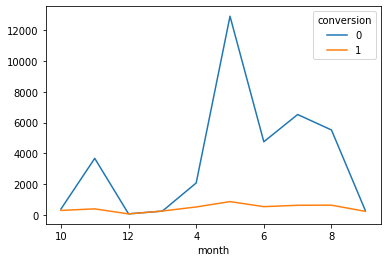

In [69]:
months.plot(kind='line')

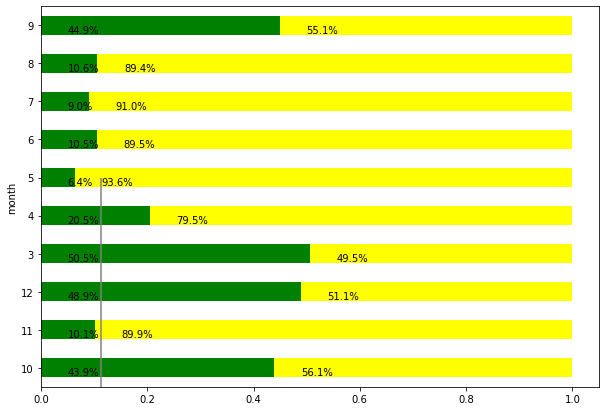

In [70]:
months= months[[1,0]]
ax = months.div(months.sum(axis=1),axis=0).plot(kind='barh',stacked=True,figsize=[10,7],color=['green','yellow'])
ax.get_legend().remove()####remove the legend. We can you also ax.get_legend().set_visible(False)
plt.vlines(0.1127,-0.7,len(days),color='grey')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.1%}'.format(width),(x+0.05,y+0.05))

Insight:
<br>
-Tháng có tỷ lệ chuyển đổi cao: 3, 9, 10, 12
<br>
-Tháng có tỷ lệ chuyển đổi thấp: 4, 5, 6, 7, 8, 11
<br>
-Tháng có tỷ lệ chuyển đổi cao thì có tỷ lệ chuyển đổi 'yes' so với 'no' xấp xỉ bằng nhau
<br>
<br>
Ứng dụng:
<br>
-Ta cần tập trung cải thiện vào những tháng có tỷ lệ chuyển đổi thấp. Và nên liên lạc với khách hàng vào những tháng có tỷ lệ chuyển đổi cao.

# **Contact**

In [71]:
contact= pd.pivot_table(df,values='y',index='contact',columns='conversion',aggfunc=len)
contact['Total'] = contact.sum(axis=1)
contact

conversion,0,1,Total
contact,,,
cellular,22283,3852,26135
telephone,14254,787,15041


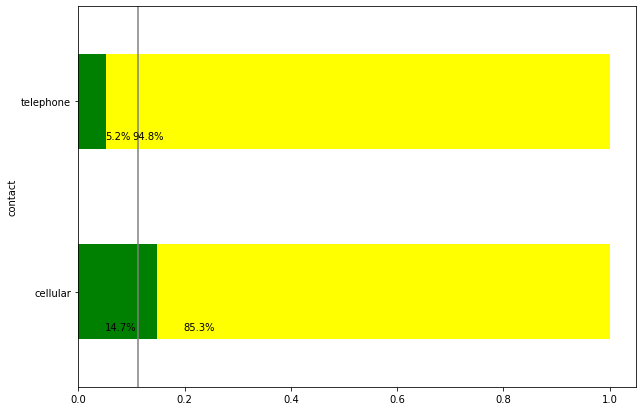

In [72]:
contact= contact[[1,0]]
ax = contact.div(contact.sum(axis=1),axis=0).plot(kind='barh',stacked=True,figsize=[10,7],color=['green','yellow'])
ax.get_legend().remove()####remove the legend. We can you also ax.get_legend().set_visible(False)
plt.vlines(0.1127,-0.7,len(days),color='grey')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.1%}'.format(width),(x+0.05,y+0.05))

Nhận xét: Theo như ta quan sát, cách liên lạc 'cellular' có tỷ lệ chuyển đổi cao gần gấp 3 so với telephone. Vì vậy rút ra được kết luận rằng: ta nên nên sử dụng cách liên lạc 'cellular'

# **duration**

In [73]:
df[df['duration']>=df.duration.mean()].groupby('y')['duration'].count()

y
no     10222
yes     3441
Name: duration, dtype: int64

In [74]:
df[df['duration']<df.duration.mean()].groupby('y')['duration'].count()

y
no     26315
yes     1198
Name: duration, dtype: int64

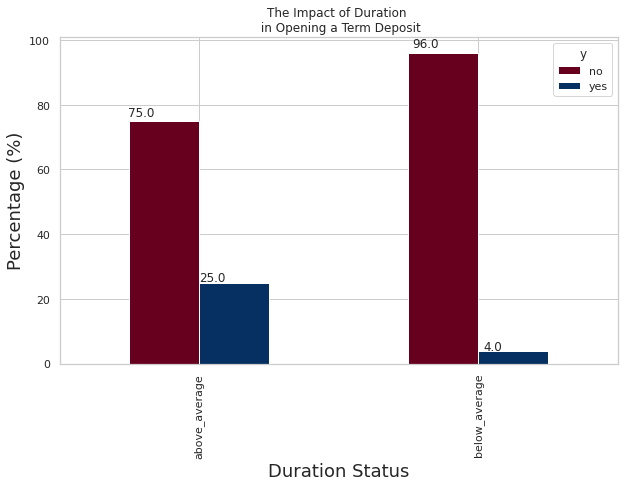

In [75]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style('whitegrid')
avg_duration = df['duration'].mean()

lst = [df]
df["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(df['duration_status'], df['y']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=12)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

In [76]:
avg_duration

258.3158150378861

Nhận xét: Khách hàng với thời gian gọi trên mức trung bình (>258s) thì sẽ có khả năng mở tài khoản tiền gửi có kỳ hạn cao hơn.
<br>
Ứng dụng: Tập trung vào tập khách hàng có thời gian gọi trên mức trung bình trong chiến dịch tiếp theo sẽ giúp chiến dịch có khả năng thành công cao hơn.